geochecking Debby's station, with fixed lats, lons

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
whos

Interactive namespace is empty.


In [11]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from salishsea_tools import visualisations as vis
from salishsea_tools import (teos_tools, tidetools, viz_tools)
import cmocean as cm
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import glob
from matplotlib import reload
%matplotlib inline

In [5]:
segment = 7
pdat = 'dic_n'
deep = 22
dirstr = './'

resdir = 'may10_a7/'
resdir = '/data/tjarniko/results/' + resdir 

depthus = nc.Dataset('/data/tjarniko/results/may10_a1/zlevels_1h.nc')
zlevels = depthus.variables['depthu']
w = glob.glob(resdir + 'SKOG_1d*ptrc_T.nc')
w2 = glob.glob(resdir + 'SKOG_1d*grid_T.nc')
w3 = glob.glob(resdir + 'SKOG_1d*grid_V.nc')
trac =  nc.Dataset(w[0])
ptrac =  nc.Dataset(w2[0])
vtrac = nc.Dataset(w3[0])

print('retrieved')


t_dic = trac.variables['dissolved_inorganic_carbon'][:]
t_sn = ptrac.variables['vosaline'][:]
t_sn[t_sn<0.1] = 0.1

tcmap = cm.cm.matter
cblabel = 'DIC μmol/l'
surtit = 'DIC norm 32 '
dic_norm = t_dic * (32/t_sn)
plotdat = dic_norm
print(dic_norm.shape)
print('we finished normalizing')

v_min = 2050
v_max = 2150

retrieved
(15, 40, 898, 398)
we finished normalizing


In [6]:
indexer = 7
surtit = 'walrus'
figtit = '_'

def a3stn_plot(plotdat, t, v_min, v_max, tcmap, dirstr, figtit, indexer, surtit, deep, cblabel):

    fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1,4, figsize = (25.5, 8.5))
    land_colour = 'slategrey'
    physdat = nc.Dataset('/data/tjarniko/results/may10_a1/tn_1h.nc')

    zlevels = physdat.variables['deptht']
    print('depth')
    print(zlevels[deep])
    td = (int(zlevels[deep]))
    print(td)
    # AX 1 
    zmax, ylocn = 41, 647
    section_slice = np.arange(110, 230)
    print('shape of plotdat')
    print(plotdat.shape)
    pdat = plotdat[t,:,ylocn,section_slice]
    print('shape of pdat')
    print(pdat.shape)
    pdat = np.ma.masked_values(plotdat[t,:,ylocn,section_slice],0)
    cmap = tcmap
    ss = section_slice[:]
    print('walrus1b')
    print(zlevels.shape)
    print(ss.shape)
    x, y, = np.meshgrid(section_slice,zlevels)
    print(x.shape)
    
    mesh = ax1.pcolormesh(
        x, y, pdat) #,
   #     cmap=tcmap, vmin=v_min, vmax=v_max,
   # )
    ax1.invert_yaxis()
    print('walrus2')
    ax1.set_xlabel('x Index', fontsize = 15)
    ax1.set_ylabel('depth (m)', fontsize = 15)
    # Axes limits and grid
    ax1.set_xlim(section_slice[1], section_slice[-1])
    ax1.set_ylim(zlevels[zmax - 2] + 20, 0)
    ax1.set_facecolor(land_colour)
    #ax1.grid()
    ax1.set_title('Crossection of Stn. 12', fontsize = 20, color = 'xkcd:bright blue')

    # AX 2
    zmax, ylocn = 41, 505
    section_slice = np.arange(190, 310)
    #pdat = plotdat[t,:,ylocn,section_slice]
    #pdat = np.ma.masked_values(plotdat[t,:,ylocn,section_slice],0)
    cmap = tcmap
    print('walrus2')
    mesh = ax2.pcolormesh(
        section_slice[:], zlevels[:zmax], pdat,
        cmap=cmap, vmin=v_min, vmax=v_max,
    )
    ax2.invert_yaxis()
    ax2.set_xlabel('x Index', fontsize = 15)
    # Axes limits and grid
    ax2.set_xlim(section_slice[1], section_slice[-1])
    ax2.set_ylim(zlevels[zmax - 2] + 20, 0)
    ax2.set_facecolor(land_colour)
    #ax2.grid()
    ax2.set_yticks([])
    ax2.set_title('Crossection of Stn. 27', fontsize = 20, color = 'xkcd:royal blue')
    
    # AX 3
    
    zmax, ylocn = 41, 423
    section_slice = np.arange(200, 320)
    pdat = plotdat[t,:,ylocn,section_slice]
    #pdat = np.ma.masked_values(plotdat[t,:,ylocn,section_slice],0)
    cmap = tcmap

    mesh = ax3.pcolormesh(
        section_slice[:], zlevels[:zmax], pdat,
        cmap=cmap, vmin=v_min, vmax=v_max,
    )
    ax3.invert_yaxis()
    ax3.set_xlabel('x Index', fontsize = 15)
    # Axes limits and grid
    ax3.set_xlim(section_slice[1], section_slice[-1])
    ax3.set_ylim(zlevels[zmax - 2] + 20, 0)
    ax3.set_facecolor(land_colour)
    #ax3.grid()
    ax3.set_yticks([])
    ax3.set_title('Crossection of Stn. 42', fontsize = 20, color = 'xkcd:red')
    
    
    ### ax4 is the map
    
    x_slice = np.arange(0, 398)
    y_slice = np.arange(0, 898)
    line_s = np.arange(120, 220)

    surf_dat =  np.ma.masked_values(plotdat[t, deep, y_slice, x_slice], 0)
    
    
    viz_tools.set_aspect(ax4)
    
    line_s = np.arange(200, 320)
    ax4.plot(
        line_s, 423*np.ones_like(line_s),
        linestyle='solid', linewidth=1.5, color='red',
        label='Section Line',
    )
    i = 263
    j = 423
    ax4.plot(i,j,marker='o',color='xkcd:red',markersize=12)
    ax4.text(i+4,j+4,'42',fontsize = 15)
    
    line_s = np.arange(190, 310)
    ax4.plot(
        line_s, 505*np.ones_like(line_s),
        linestyle='solid', linewidth=1.5, color='xkcd:royal blue',
        label='Section Line',
    )
    i = 246
    j = 505
    ax4.plot(i,j,marker='o',color='xkcd:royal blue',markersize=12)
    ax4.text(i+4,j+4,'27',fontsize = 15)
    
    
    
    line_s = np.arange(110, 230)
    ax4.plot(
        line_s, 647*np.ones_like(line_s),
        linestyle='solid', linewidth=1.5, color='xkcd:bright blue',
        label='Section Line',
    )
    i = 168
    j = 647
    ax4.plot(i,j,marker='o',color='xkcd:bright blue',markersize=12)
    ax4.text(i+4,j+4,'12',fontsize = 15)
    
    
    cmap.set_bad(land_colour)
    mesh = ax4.pcolormesh(surf_dat, cmap=tcmap, vmin = v_min, vmax = v_max)
    ax4.set_xlabel('')
    ax4.set_ylabel('')
    #ax4.set_xticks([])
    #ax4.set_yticks([])
    #legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)
    ax4.grid()
    cbar = fig.colorbar(mesh, ax=ax4)
    cbar.set_label(cblabel, fontsize = 15)
    if td < 1:
        ax4.set_title('Surface ' + surtit, fontsize = 20, color = 'black')
    else:
        ax4.set_title(surtit +'at depth ' + str(td) +' m', fontsize = 20, color = 'black')
    #####


    t_index = indexer + t
    si = str(t_index)
    if len(si) == 1:
        lsi = '000' + si
    if len(si) == 2:
        lsi = '00' + si
    if len(si) == 3:
        lsi = '0' + si
    if len(si) == 4:
        lsi = si

    tit2 = datestring_spitter_DAY(t_index)
    
    tit = surtit + tit2
    plt.suptitle(tit, fontsize = 20)
    total_fig = dirstr+figtit+ lsi + '.png'
    #fig.savefig(total_fig)
    plt.show()
    #plt.close(fig)

In [8]:
tcmap = cm.cm.matter
cblabel = 'DIC μmol/l'
surtit = 'DIC norm 32 '
plotdat = dic_norm
print(dic_norm.shape)
v_min = 2050
v_max = 2150
t = 0
indexer = 7
a3stn_plot(plotdat, t, v_min, v_max, tcmap, dirstr, figtit, indexer, surtit, deep, cblabel)

(15, 40, 898, 398)
depth
34.6858
34
shape of plotdat
(15, 40, 898, 398)
shape of pdat
(120, 40)
walrus1b
(40,)
(120,)
(40, 120)


TypeError: Dimensions of C (120, 40) are incompatible with X (120) and/or Y (40); see help(pcolormesh)

(15, 40, 898, 398)
depth
34.6858
34
shape of plotdat
(15, 40, 898, 398)
shape of pdat
(40, 120)
ok well whats in it, at depth index 20
[    0.             0.             0.             0.             0.             0.
     0.             0.             0.             0.             0.             0.
     0.             0.          1931.13964844  1932.03063965  1932.59106445
  1932.68371582     0.             0.             0.             0.             0.
  1991.00402832  1995.00842285  1995.28051758  1996.671875    1997.95825195
  1998.77844238  1999.09387207  1999.49853516     0.          2000.54211426
  2004.41186523  2005.79211426  2006.72229004  2006.08984375  2005.73779297
  2004.83728027  2004.40710449  2004.00061035  2003.68933105  2003.29077148
  2003.14355469  2003.02880859  2002.91711426  2002.52539062  2001.46691895
  1999.78015137  1997.99902344  1996.09619141  1994.046875    1992.4543457
  1991.67614746  1991.48303223  1991.06347656  1990.45910645  1989.88049316
  1989.41

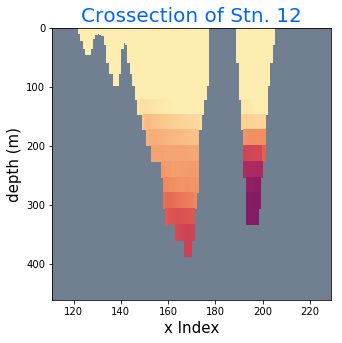

In [67]:
tcmap = cm.cm.matter
cblabel = 'DIC μmol/l'
surtit = 'DIC norm 32 '
plotdat = dic_norm
# plotdat = oxy
print(dic_norm.shape)
v_min = 2050
v_max = 2150
t = 0
indexer = 7
t_dic = trac.variables['dissolved_inorganic_carbon']
plotdat = t_dic
section_slice = np.arange(110, 230)

fig, ((ax1)) = plt.subplots(1,1, figsize = (5, 5))
land_colour = 'slategrey'
physdat = nc.Dataset('/data/tjarniko/results/may10_a1/tn_1h.nc')

zlevels = physdat.variables['deptht']
print('depth')
print(zlevels[deep])
td = (int(zlevels[deep]))
print(td)
# AX 1 
zmax, ylocn = 41, 647
print('shape of plotdat')
print(plotdat.shape)
pdat = plotdat[t,:,ylocn,section_slice]
print('shape of pdat')
print(pdat.shape)
print('ok well whats in it, at depth index 20')
print(pdat[20,:])
pdat = np.ma.masked_values(plotdat[t,:,ylocn,section_slice],0)
#pdat = plotdat[t,:,ylocn,section_slice]
print(type(pdat))
cmap = tcmap
ss = section_slice[:]
print('walrus1b')
print(zlevels.shape)
print(ss.shape)
x, y, = np.meshgrid(section_slice,zlevels)
print(x.shape)

mesh = ax1.pcolormesh(
    x, y, pdat, cmap=tcmap, vmin=v_min, vmax=v_max)
ax1.invert_yaxis()
print('walrus2')
ax1.set_xlabel('x Index', fontsize = 15)
ax1.set_ylabel('depth (m)', fontsize = 15)
# Axes limits and grid
ax1.set_xlim(section_slice[1], section_slice[-1])
ax1.set_ylim(zlevels[zmax - 2] + 20, 0)
ax1.set_facecolor(land_colour)
#ax1.grid()
ax1.set_title('Crossection of Stn. 12', fontsize = 20, color = 'xkcd:bright blue')

plt.show()

In [14]:
help(pcolormesh)

NameError: name 'pcolormesh' is not defined

In [46]:
toy_dic = np.zeros([2,2,3])
toy_sal = np.zeros([2,2,3])
toy_dic[:,:,2] = 2200
toy_dic[:,:,1] = 2100
toy_dic[:,:,0] = 2000

toy_sal[:,1,:] = 16
toy_sal[:,0,:] = 32

dic_norm = toy_dic * (32/toy_sal)

print(dic_norm)
norm_sal = 32/toy_sal
print(toy_dic)
print('toy sal')
print(toy_sal)
print('norm sal')
print(norm_sal)
print('ns * dic')
print(toy_dic * norm_sal)
print(toy_dic.shape)


[[[   inf    inf    inf]
  [ 4000.  4200.  4400.]]

 [[   inf    inf    inf]
  [ 4000.  4200.  4400.]]]
[[[ 2000.  2100.  2200.]
  [ 2000.  2100.  2200.]]

 [[ 2000.  2100.  2200.]
  [ 2000.  2100.  2200.]]]
toy sal
[[[  0.   0.   0.]
  [ 16.  16.  16.]]

 [[  0.   0.   0.]
  [ 16.  16.  16.]]]
norm sal
[[[ inf  inf  inf]
  [  2.   2.   2.]]

 [[ inf  inf  inf]
  [  2.   2.   2.]]]
ns * dic
[[[   inf    inf    inf]
  [ 4000.  4200.  4400.]]

 [[   inf    inf    inf]
  [ 4000.  4200.  4400.]]]
(2, 2, 3)


/home/tjarniko/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in true_divide
/home/tjarniko/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in true_divide


In [47]:
t_dic = trac.variables['dissolved_inorganic_carbon'][:]
t_sn = ptrac.variables['vosaline'][:]
t_sn[t_sn<0.1] = 0.1

tcmap = cm.cm.matter
cblabel = 'DIC μmol/l'
surtit = 'DIC norm 32 '
dic_norm = t_dic * (32/t_sn)
print('done')

done


2015.93
29.9295
2155.38
*
1848.38
25.7426
2297.68
[[2223.9736328125 2223.554931640625 2223.557373046875 2224.574951171875
  2224.609130859375 2223.768798828125 2223.5673828125 2223.2529296875
  2221.978515625 2220.406005859375 2217.448486328125 2215.0400390625
  2213.443603515625 2212.372802734375 2210.79736328125 2209.23388671875
  2207.223876953125 2204.926025390625 2202.945068359375 2200.928466796875
  2198.28466796875 2194.760498046875 2186.098388671875 2174.15185546875
  2162.866455078125 2156.993896484375 2148.585205078125 2145.18798828125
  2144.34521484375 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [2223.64794921875 2223.15185546875 2223.802001953125 2224.779541015625
  2226.058837890625 2225.38623046875 2224.31396484375 2223.17431640625
  2221.919921875 2220.283447265625 2219.197998046875 2216.512451171875
  2214.17626953125 2212.8271484375 2210.84716796875 2209.027099609375
  2206.640625 2203.87841796875 2201.20556640625 2199.872314453125
  2198.34765625 2194.349365234375 

IndexError: index 20 is out of bounds for axis 0 with size 10

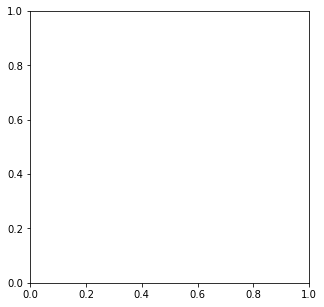

In [66]:
print(t_dic[0,0,250,250])
print(t_sn[0,0,250,250])
print(dic_norm[0,0,250,250])

print('*')
j = 500
i = 211
print(t_dic[0,0,j,i])
print(t_sn[0,0,j,i])
print(dic_norm[0,0,j,i])

zmax, ylocn = 41, 647
section_slice = np.arange(150, 160)
print(dic_norm[0,:,ylocn,section_slice])
print('*')
print(t_dic[0,:,ylocn,section_slice])







tcmap = cm.cm.matter
cblabel = 'DIC μmol/l'
surtit = 'DIC norm 32 '
plotdat = t_dic
# plotdat = oxy
print(dic_norm.shape)
v_min = 2050
v_max = 2150
t = 0
indexer = 7
t_dic = trac.variables['dissolved_inorganic_carbon']
#plotdat = t_dic

fig, ((ax1)) = plt.subplots(1,1, figsize = (5, 5))
land_colour = 'slategrey'
physdat = nc.Dataset('/data/tjarniko/results/may10_a1/tn_1h.nc')

zlevels = physdat.variables['deptht']
print('depth')
print(zlevels[deep])
td = (int(zlevels[deep]))
print(td)
# AX 1 
zmax, ylocn = 41, 647
#section_slice = np.arange(110, 230)
print('shape of plotdat')
print(plotdat.shape)
pdat = plotdat[t,:,ylocn,section_slice]
print('shape of pdat')
print(pdat.shape)
print('ok well whats in it, at depth index 20')
print(pdat[20,:])
pdat = np.ma.masked_values(plotdat[t,:,ylocn,section_slice],0)
#pdat = plotdat[t,:,ylocn,section_slice]
print(type(pdat))
cmap = tcmap
ss = section_slice[:]
print('walrus1b')
print(zlevels.shape)
print(ss.shape)
x, y, = np.meshgrid(section_slice,zlevels)
print(x.shape)

mesh = ax1.pcolormesh(
    x, y, pdat, cmap=tcmap, vmin=v_min, vmax=v_max)
ax1.invert_yaxis()
print('walrus2')
ax1.set_xlabel('x Index', fontsize = 15)
ax1.set_ylabel('depth (m)', fontsize = 15)
# Axes limits and grid
ax1.set_xlim(section_slice[1], section_slice[-1])
ax1.set_ylim(zlevels[zmax - 2] + 20, 0)
ax1.set_facecolor(land_colour)
#ax1.grid()
ax1.set_title('Crossection of Stn. 12', fontsize = 20, color = 'xkcd:bright blue')

plt.show()





In [85]:
pd = dic_norm
print(pd.shape)
pd2 = t_dic
print(pd2.shape)
pd3 = t_sn

i = 110
i2 = 230
j = 647
z1 = 0
z2 = 1
print('norm')
print(pd[0,z1:z2,j,i:i2])
print('nn')
print(pd2[0,z1:z2,j,i:i2])
print('sal')
print(pd3[0,z1:z2,j,i:i2])
# pdat = plotdat[t,:,ylocn,section_slice]
# print('shape of pdat')
# print(pdat.shape)
# print('ok well whats in it, at depth index 20')
# print(pdat[20,:])

(15, 40, 898, 398)
(15, 40, 898, 398)
norm
[[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2245.7822265625
  2245.430908203125 2246.70751953125 2179.81640625 2161.068603515625
  2153.4091796875 2170.5380859375 2168.020751953125 2159.48095703125
  2180.0537109375 2197.5576171875 2212.151123046875 2222.242919921875
  2227.27099609375 2228.931884765625 2231.957763671875 2232.434326171875
  2232.911376953125 2231.9892578125 2230.805419921875 2230.77392578125
  2230.257568359375 2231.3857421875 2232.824951171875 2226.778564453125
  2225.37451171875 2225.258544921875 2224.445556640625 2223.9736328125
  2223.64794921875 2224.176025390625 2224.224853515625 2223.86181640625
  2225.976806640625 2226.03076171875 2226.105224609375 2226.436767578125
  2225.824951171875 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2224.491455078125
  2227.869384765625 2233.075439453125 2233.683837890625 2250.610107421875
  2278.1669921875 2336.693359375 2361.695068359375 2379.354248046875
  2382.21044921875 2376.3217773437